In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
colors = pd.read_csv('./dataset/colors.csv')
colors.head(5)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
inventory_parts = pd.read_csv('./dataset/inventory_parts.csv')
inventory_parts.head(5)

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [4]:
inventory_parts['quantity'].value_counts(ascending=True)

quantity
166         1
260         1
388         1
450         1
810         1
        ...  
6       20144
3       31219
4       62072
2      161796
1      239479
Name: count, Length: 239, dtype: int64

In [5]:
inventory_parts_with_color = inventory_parts.merge(colors, left_on='color_id', right_on='id', how='left')
inventory_parts_with_color.rename(columns={'name': 'color_name'}, inplace=True)
inventory_parts_with_color = inventory_parts_with_color[['inventory_id', 'part_num', 'color_id', 'color_name', 'rgb', 'is_trans', 'quantity', 'is_spare']]
inventory_parts_with_color.head(5)

,inventory_id,part_num,color_id,color_name,rgb,is_trans,quantity,is_spare
0,1,48379c01,72,Dark Bluish Gray,6C6E68,f,1,f
1,1,48395,7,Light Gray,9BA19D,f,1,f
2,1,mcsport6,25,Orange,FE8A18,f,1,f
3,1,paddle,0,Black,05131D,f,1,f
4,3,11816pr0005,78,Light Flesh,F6D7B3,f,1,f


In [6]:
inventories = pd.read_csv('./dataset/inventories.csv')
inventories.head(5)

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [7]:
inventory_sets = pd.read_csv('./dataset/inventory_sets.csv')
inventory_sets.head(5)

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [8]:
sets = pd.read_csv('./dataset/sets.csv')
sets.head(5)

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
parts = pd.read_csv('./dataset/parts.csv')
parts.head(5)

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [10]:
# parts['name'].value_counts()
parts.shape
# parts['part_cat_id'].isna().value_counts()

(25993, 3)

In [11]:
part_categories = pd.read_csv('./dataset/part_categories.csv')
part_categories.head(5)

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [12]:
parts_with_categories = parts.merge(part_categories, left_on='part_cat_id', right_on='id', how='left')
parts_with_categories.rename(columns={'name_y': 'part_category', 'name_x': 'part_name'}, inplace=True)
parts_with_categories = parts_with_categories[['part_num', 'part_name', 'part_cat_id', 'part_category']]
parts_with_categories.head(5)


,part_num,part_name,part_cat_id,part_category
0,0687b1,Set 0687 Activity Booklet 1,17,Non-LEGO
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,Baseplates
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1,Baseplates
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1,Baseplates
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1,Baseplates


In [13]:
parts_with_categories_graph = parts_with_categories['part_category'].value_counts()
parts_with_categories_graph.sort_values(ascending=True)

part_category
Tools                                              8
Technic Bushes                                     9
Technic Pins                                      19
Znap                                              22
Technic Beams Special                             22
HO Scale                                          23
Technic Bricks                                    26
Mechanical                                        28
Pneumatics                                        28
Technic Axles                                     28
Tiles                                             30
Technic Beams                                     32
Rock                                              35
Magnets and Holders                               36
Technic Panels                                    56
Plates Angled                                     57
Plates                                            62
Technic Gears                                     68
Technic Steering, Suspension and

In [14]:
matplotlib.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(figsize=(18,4))
parts_with_categories_graph.plot(kind="bar", color="green", alpha=1)

plt.ylabel('Number of Parts')
plt.title('Number of Parts in Each Part Category')
plt.xticks(rotation=90)
plt.legend()

plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/admin/Documents/Maestria_IoT/Analisis_de_Datos/ADD_Lego/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
  File "/var/folders/dq/71d8kdfn3yx09dksy7b8hzg40000gp/T/ipykernel_78189/591619388.py", line 3, in <module>
    fig, axs = plt.subplots(figsize=(18,4))
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/admin/Documents/Maestria_IoT/Analisis_de_Datos/ADD_Lego/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py", line 1598, in subplots
    fig = figure(**fig_kw)
          ^^^^^^^^^^^^^^^^
  File "/Users/admin/Documents/Maestria_IoT/Analisis_de_Datos/ADD_Lego/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py", line 934, in figure
    manager = new_figure_manager(
              ^^^^^^^^^^^^^^^^^^^
  File "/Users/admin/Documents/Maestria_IoT/Analisis_de_Datos/ADD_Lego/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py", line 464, in new_figure_manager
    _warn_if_gui_out_

In [15]:
inventory_with_parts = inventory_parts_with_color.merge(parts_with_categories, on='part_num', how='left')
inventory_with_parts.rename(columns={'name': 'part_name'}, inplace=True)
inventory_with_parts.head(5)

,inventory_id,part_num,color_id,color_name,rgb,is_trans,quantity,is_spare,part_name,part_cat_id,part_category
0,1,48379c01,72,Dark Bluish Gray,6C6E68,f,1,f,Sports Promo Figure Base with Feet,27.0,Minifig Accessories
1,1,48395,7,Light Gray,9BA19D,f,1,f,Sports Promo Snowboard from McDonald's Sports ...,27.0,Minifig Accessories
2,1,mcsport6,25,Orange,FE8A18,f,1,f,Sports Promo Figure Head Torso Assembly McDona...,13.0,Minifigs
3,1,paddle,0,Black,05131D,f,1,f,Sports Promo Paddle from McDonald's Sports Sets,27.0,Minifig Accessories
4,3,11816pr0005,78,Light Flesh,F6D7B3,f,1,f,"Minifig Head Modified - Friends - Green Eyes, ...",13.0,Minifigs


In [16]:
inventory_with_parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   inventory_id   580251 non-null  int64  
 1   part_num       580251 non-null  object 
 2   color_id       580251 non-null  int64  
 3   color_name     580251 non-null  object 
 4   rgb            580251 non-null  object 
 5   is_trans       580251 non-null  object 
 6   quantity       580251 non-null  int64  
 7   is_spare       580251 non-null  object 
 8   part_name      580069 non-null  object 
 9   part_cat_id    580069 non-null  float64
 10  part_category  580069 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 48.7+ MB


In [17]:
inventory_with_parts.shape
# Ultimas 3 columnas (part_name, part_cat_id, category) poseen al menos 182 nulls

(580251, 11)

In [18]:
inventory_with_parts_grouped=inventory_with_parts.groupby('part_num')['quantity'].sum().reset_index().sort_values(by='quantity')
# inventory_with_parts_graph=inventory_with_parts_graph.head(100)
# inventory_with_parts_graph['part_num'].value_counts()
print(inventory_with_parts_grouped)


         part_num  quantity
0          0687b1         1
13180  60119stk01         1
13181       60125         1
13183  60128stk01         1
13184  60129stk01         1
...           ...       ...
4448         3005     46973
4314         3003     48543
13675        6141     53535
4983         3023     58777
4385         3004     69250

[23131 rows x 2 columns]


In [19]:

min_range = inventory_with_parts_grouped['quantity'].min()
max_range = inventory_with_parts_grouped['quantity'].max() + 2

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.hist(inventory_with_parts_grouped['quantity'], bins=range(min_range, max_range), color='skyblue', edgecolor='black', align='left')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Original Frequency of Quantities')

min_range = inventory_with_parts_grouped['quantity'].min()
max_range = 20

plt.subplot(1, 3, 2)
plt.hist(inventory_with_parts_grouped['quantity'], bins=range(min_range, max_range), color='skyblue', edgecolor='black', align='left')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('HEAD Frequency of Quantities')

min_range = 1000
max_range = inventory_with_parts_grouped['quantity'].max() + 2

plt.subplot(1, 3, 3)
plt.hist(inventory_with_parts_grouped['quantity'], bins=range(min_range, max_range), color='skyblue', edgecolor='black', align='left')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('TAIL Frequency of Quantities')

plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/admin/Documents/Maestria_IoT/Analisis_de_Datos/ADD_Lego/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
  File "/var/folders/dq/71d8kdfn3yx09dksy7b8hzg40000gp/T/ipykernel_78189/2398367994.py", line 4, in <module>
    plt.figure(figsize=(14, 6))
  File "/Users/admin/Documents/Maestria_IoT/Analisis_de_Datos/ADD_Lego/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py", line 934, in figure
    manager = new_figure_manager(
              ^^^^^^^^^^^^^^^^^^^
  File "/Users/admin/Documents/Maestria_IoT/Analisis_de_Datos/ADD_Lego/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py", line 464, in new_figure_manager
    _warn_if_gui_out_of_main_thread()
  File "/Users/admin/Documents/Maestria_IoT/Analisis_de_Datos/ADD_Lego/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py", line 441, in _warn_if_gui_out_of_main_thread
    canvas_class = cast(type[FigureCanvasBase], _get_backend_mod().Fig

In [20]:
result = inventory_with_parts[inventory_with_parts['part_num'] == '3024']
result = result[['inventory_id', 'quantity', 'part_num']]
print(result)
result['quantity'].sum()

        inventory_id  quantity part_num
63                17         6     3024
85                22         1     3024
86                22         2     3024
87                22         4     3024
88                22         1     3024
...              ...       ...      ...
579728         18584         1     3024
579885         18593         2     3024
580193         18708         2     3024
580194         18708         2     3024
580195         18708         2     3024

[6309 rows x 3 columns]


42035

In [21]:
themes = pd.read_csv('./dataset/themes.csv')
themes.head(5)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [22]:
sets_with_themes = sets.merge(themes, left_on='theme_id', right_on='id', how='left')
sets_with_themes.rename(columns={'name_y': 'theme_name', 'name_x': 'name'}, inplace=True)
sets_with_themes = sets_with_themes[['set_num', 'name', 'year', 'theme_id', 'theme_name', 'parent_id', 'num_parts']]
sets_with_themes.head(5)


,set_num,name,year,theme_id,theme_name,parent_id,num_parts
0,00-1,Weetabix Castle,1970,414,Castle,411.0,471
1,0011-2,Town Mini-Figures,1978,84,Supplemental,67.0,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,Lion Knights,186.0,2
3,0012-1,Space Mini-Figures,1979,143,Supplemental,126.0,12
4,0013-1,Space Mini-Figures,1979,143,Supplemental,126.0,12


In [23]:
inventory_sets = pd.read_csv('./dataset/inventory_sets.csv')
inventory_sets.head(5)

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [24]:
inventory_sets_with_sets = inventory_sets.merge(sets_with_themes, on='set_num', how='left')
inventory_sets_with_sets.head(5)

,inventory_id,set_num,quantity,name,year,theme_id,theme_name,parent_id,num_parts
0,35,75911-1,1,McLaren Mercedes Pit Stop,2015,601,Speed Champions,NaN,340
1,35,75912-1,1,Porsche 911 GT Finish Line,2015,601,Speed Champions,NaN,561
2,39,75048-1,1,The Phantom,2014,182,Star Wars Rebels,158.0,233
3,39,75053-1,1,The Ghost,2014,182,Star Wars Rebels,158.0,927
4,50,4515-1,1,Straight Rails,1991,244,9V,241.0,8


In [25]:
inventory_sets_with_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   inventory_id  2846 non-null   int64  
 1   set_num       2846 non-null   object 
 2   quantity      2846 non-null   int64  
 3   name          2846 non-null   object 
 4   year          2846 non-null   int64  
 5   theme_id      2846 non-null   int64  
 6   theme_name    2846 non-null   object 
 7   parent_id     2582 non-null   float64
 8   num_parts     2846 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 200.2+ KB


In [26]:
inventories = pd.read_csv('./dataset/inventories.csv')
inventories.head(5)

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [27]:
inventories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB


# Preparación del dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Obtención del DataFrame principal

Encuentro una dataframe para la combinación de colores y partes. Las claves están dadas por inventory_id, que son como lotes de partes, correspondientes a sets.
Part_num es un ID alfanumeríco, y algunos incluso no tienen nombre (dan NaN), y por lo tanto también sus categorias.

In [29]:
inventory_parts = pd.read_csv('./dataset/inventory_parts.csv')
colors = pd.read_csv('./dataset/colors.csv')
inventory_sets = pd.read_csv('./dataset/inventory_sets.csv')
inventories = pd.read_csv('./dataset/inventories.csv')
sets = pd.read_csv('./dataset/sets.csv')
part_categories = pd.read_csv('./dataset/part_categories.csv')
themes = pd.read_csv('./dataset/themes.csv')
parts = pd.read_csv('./dataset/parts.csv')

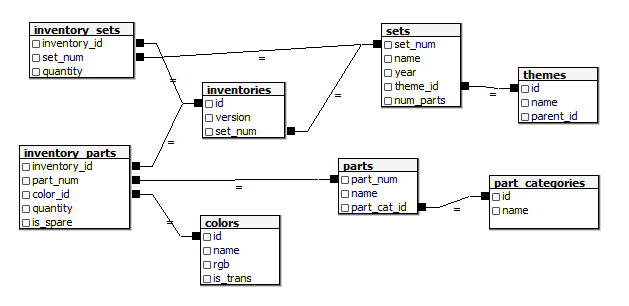

In [30]:
parts_colors = inventory_parts.merge(colors, left_on='color_id', right_on='id', how='left').drop('id',axis=1).rename(columns={'name': 'color_name'})
parts_colors = parts_colors.merge(parts, left_on='part_num', right_on='part_num', how='left').rename(columns={'name': 'part_name'})
complete_parts = parts_colors.merge(part_categories, left_on='part_cat_id',right_on='id', how='left').drop('id',axis=1).rename(columns={'name': 'category_name'})

Interesa ahora un data frame completo, incluyendo los sets. Aca incluira la información de sets, y sus temáticas, y no debería agregar más filas. Se parte de inventories, y de complete_parts.

In [31]:
complete_data = complete_parts.merge(inventories, left_on='inventory_id', right_on='id', how='left').drop('id',axis=1)
complete_data = complete_data.merge(sets, left_on='set_num', right_on='set_num', how='left').rename(columns={'name': 'set_name'})
complete_data = complete_data.merge(themes, left_on='theme_id', right_on='id', how='inner').drop('id',axis=1).rename(columns={'name': 'theme_name'})
complete_data.head(5)

,inventory_id,part_num,color_id,quantity,is_spare,color_name,rgb,is_trans,part_name,part_cat_id,category_name,version,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id
0,1,48379c01,72,1,f,Dark Bluish Gray,6C6E68,f,Sports Promo Figure Base with Feet,27.0,Minifig Accessories,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
1,1,48395,7,1,f,Light Gray,9BA19D,f,Sports Promo Snowboard from McDonald's Sports ...,27.0,Minifig Accessories,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
2,1,mcsport6,25,1,f,Orange,FE8A18,f,Sports Promo Figure Head Torso Assembly McDona...,13.0,Minifigs,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
3,1,paddle,0,1,f,Black,05131D,f,Sports Promo Paddle from McDonald's Sports Sets,27.0,Minifig Accessories,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
4,7075,2431,0,2,f,Black,05131D,f,Tile 1 x 4 with Groove,19.0,Tiles,1,3537-1,Skateboard Vert Park Challenge,2003,460,91,Gravity Games,458.0


Un ejemplo de un set:

In [32]:
print(complete_data.groupby('set_name')['quantity'].sum())
complete_data.loc[complete_data['set_name']=="'Where Are My Pants?' Guy"]

set_name
 Scenery and Dagger Trap polybag       25
 Spectre                                7
'Where Are My Pants?' Guy               6
1 x 1 Bricks                          400
1 x 1 Bricks with Letters (System)     44
                                     ... 
{Red Race Car Number 3}                39
{Roadplates and Scenery}               85
{Rock Saw Vehicle}                     22
{Town Vehicles}                       158
{Yellow Cab}                           46
Name: quantity, Length: 9457, dtype: int64


,inventory_id,part_num,color_id,quantity,is_spare,color_name,rgb,is_trans,part_name,part_cat_id,category_name,version,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id
378871,5048,3626cpr1305,14,1,f,Yellow,F2CD37,f,"Minifig Head Male Black Eyebrows, Open Mouth S...",13.0,Minifigs,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0
378872,5048,88646,0,1,f,Black,05131D,f,Tile Special 4 x 3 with 4 Studs in Centre,15.0,Tiles Special,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0
378873,5048,970c00,15,1,f,White,FFFFFF,f,Legs and Hips [Complete Assembly],13.0,Minifigs,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0
378874,5048,970x001,14,1,f,Yellow,F2CD37,f,Legs and White Hips,13.0,Minifigs,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0
378875,5048,973pr2522c01,1,1,f,Blue,0055BF,f,Torso - Hawaiian Shirt with Orange and Red Flo...,13.0,Minifigs,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0
378876,5048,98371,0,1,f,Black,05131D,f,Minifig Hair Swept Back with Forelock,13.0,Minifigs,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0


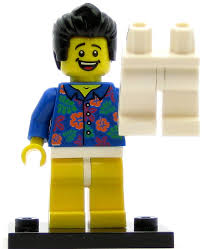

# Ajustes iniciales
Ahora se buscan columnas que no sirven para nada. Is_trans e Is_spare importan poco, y además busca los tipos de datos. De todas formas, todo esto parece ser 100% categorico.

In [33]:
data = complete_data.drop(['is_spare','is_trans'],axis=1)
print(f"Total amount of rows is {data['inventory_id'].count()}")
print(f"Total amount of columns is {len(data.columns)}")
numerical_features = data.select_dtypes([np.number]).columns.to_list()
print(f"Total number of numeric columns is {len(numerical_features)}")
categorical_features = data.select_dtypes([object]).columns.to_list()
print(f"Total number of categorical columns is {len(categorical_features)}")

Total amount of rows is 580251
Total amount of columns is 17
Total number of numeric columns is 9
Total number of categorical columns is 8


## Imputación de valores faltantes

In [34]:
data.isnull().any()

inventory_id     False
part_num         False
color_id         False
quantity         False
color_name       False
rgb              False
part_name         True
part_cat_id       True
category_name     True
version          False
set_num          False
set_name         False
year             False
theme_id         False
num_parts        False
theme_name       False
parent_id         True
dtype: bool

Parent_id en NaN indica que no tiene padre, y prefiero que eso sea 0 en vez de un NaN. La verdad es una columna que no sirve para nada, pero por el momento se corrige. Los part_name nulls, parecen ser part_number que no estan en la tabla 'parts'. El nombre no es importante, así que se copia el part_num cuando es NaN, pero lo que es category/category_id, hay que hacer alguna forma de imputación por set. 

In [35]:
data['parent_id'] = data['parent_id'].apply(lambda x: x if not np.isnan(x) else 0)
data[data['part_name'].isna()].sort_values('part_num')

,inventory_id,part_num,color_id,quantity,color_name,rgb,part_name,part_cat_id,category_name,version,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id
284929,5850,19807,297,1,Pearl Gold,AA7F2E,NaN,NaN,NaN,1,70591-1,Kryptarium Prison Breakout,2016,435,202,Ninjago,0.0
1095,2467,2476,15,3,White,FFFFFF,NaN,NaN,NaN,1,40114-1,LEGO Friends Buildable Jewelry Box,2014,494,201,Friends,0.0
454763,11202,2476,71,12,Light Bluish Gray,A0A5A9,NaN,NaN,NaN,1,70165-1,Ultra Agents Mission HQ,2014,303,1056,Ultra Agents,302.0
177116,2152,2476,71,3,Light Bluish Gray,A0A5A9,NaN,NaN,NaN,1,10191-1,Star Justice,2008,397,884,Factory,0.0
226357,7153,2476,71,4,Light Bluish Gray,A0A5A9,NaN,NaN,NaN,1,70132-1,Scorm's Scorpion Stinger,2014,571,433,Legends of Chima,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417952,6738,rb00164,0,1,Black,05131D,NaN,NaN,NaN,1,8854-1,Power Crane,1989,7,516,Construction,5.0
410842,13982,rb00164,0,1,Black,05131D,NaN,NaN,NaN,1,7033-1,Armored Car Action,2003,111,179,Police,105.0
218503,16351,rb00164,0,1,Black,05131D,NaN,NaN,NaN,1,9454-1,Function Set,1992,534,350,Universal Building Set,507.0
372875,3964,rb00164,0,1,Black,05131D,NaN,NaN,NaN,1,3800-1,Ultimate Builders Set,2001,260,322,RCX,258.0


Para las categorias de partes, se decide imputar por estadísticos, particularmente la moda. Se puede mejorar su precisión buscando la moda por temática o set, eligiendo la primera porque hay más opciones de categorías (ya que las temáticas son supersets de los sets) posibles dentra de cada una, lo que no limita las categorias a las pocas que pueda tener no nulas cada set.

In [36]:
data.loc[data['part_name'].isna(),'part_name'] = data['part_num']
print(f"Hay un total de {data[data['category_name'].isna()].sort_values('part_num').shape[0]} filas con categorias NaN")
print(f"Hay {data[data['category_name'].isna()].sort_values('set_name').groupby(['theme_name']).count().shape[0]} tematicas distintas con valores NaN")
print(f"Hay {data[data['category_name'].isna()].sort_values('set_name').groupby(['set_name']).count().shape[0]} sets distintos con valores NaN")

#Se obtiene un diccionario con el valor mas frecuente de category_id, indexado por theme_id. Es decir, se obtiene el id de categoria más frecuente por cada tematica.
modeCategoryIdByThemeId = data.groupby(['theme_id'])['part_cat_id'].agg(lambda series: series.mode()[0]).to_dict()
#Un diccionario de sets con los nombres para cada id de categoria.
categoryNameById = data.groupby(['part_cat_id'])['category_name'].agg(lambda series: series.unique()[0]).to_dict()

#Se obtiene un dataframe temporal con theme_id mapeado a su moda, y se usa para completar los NaN de part_cat_id.
data['part_cat_id'] = data['part_cat_id'].fillna(data['theme_id'].map(modeCategoryIdByThemeId))
#Lo mismo para category_name.
data['category_name'] = data['category_name'].fillna(data['part_cat_id'].map(categoryNameById))
data.isnull().any()

Hay un total de 182 filas con categorias NaN
Hay 77 tematicas distintas con valores NaN
Hay 159 sets distintos con valores NaN


inventory_id     False
part_num         False
color_id         False
quantity         False
color_name       False
rgb              False
part_name        False
part_cat_id      False
category_name    False
version          False
set_num          False
set_name         False
year             False
theme_id         False
num_parts        False
theme_name       False
parent_id        False
dtype: bool

## Desbalance de clases

Es primero interesante plantearse si el desbalance es realmente un problema: vease https://stats.stackexchange.com/questions/357466/are-unbalanced-datasets-problematic-and-how-does-oversampling-purport-to-he.

set_num  part_num
00-1     3004        4
         3001a       3
         3062a       3
         3010        3
         3009        3
                    ..
vwkit-1  3030        1
         3004        1
         3003        1
         132a        1
         7049b       1
Name: count, Length: 440659, dtype: int64

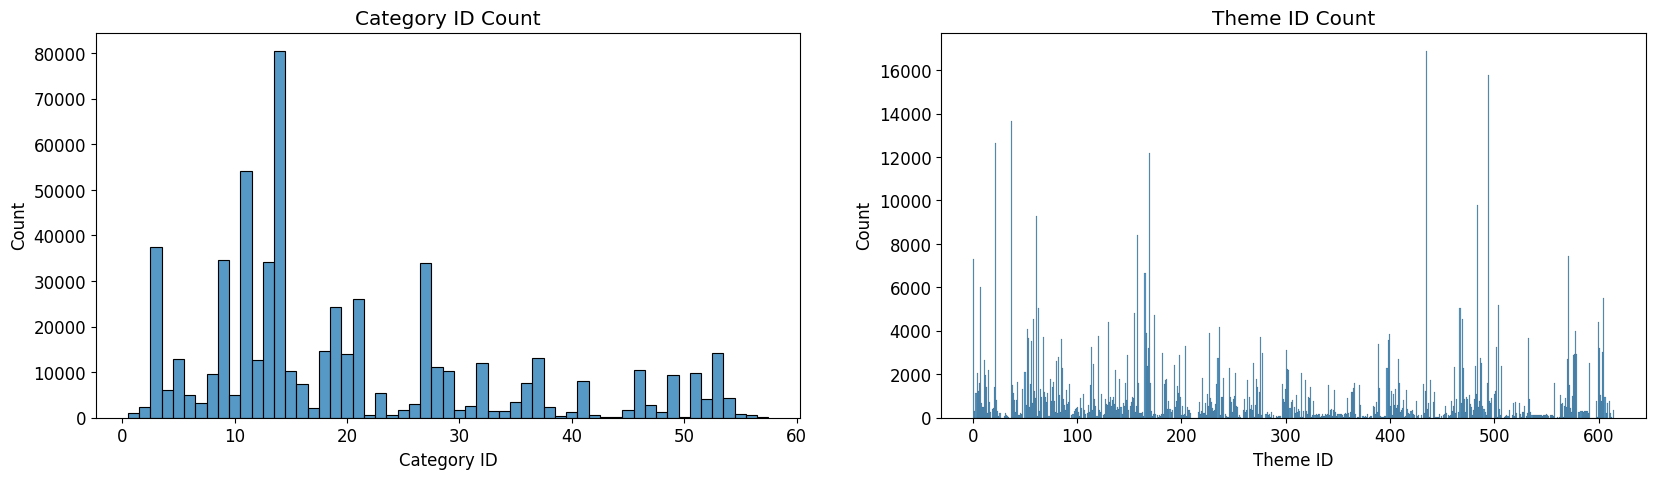

In [ ]:
import seaborn as sns

data[['part_cat_id']].value_counts().sort_values(ascending=True)
fig, axs = plt.subplots(ncols=2,figsize=(20, 5))
sns.histplot(data = data['part_cat_id'], discrete=True, ax=axs[0])
axs[0].set_title('Category ID Count')
axs[0].set_xlabel('Category ID')
axs[0].set_ylabel('Count')
sns.histplot(data = data['theme_id'], discrete=True, ax=axs[1])
axs[1].set_title('Theme ID Count')
axs[1].set_xlabel('Theme ID')
axs[1].set_ylabel('Count')
data.groupby('set_num')[['part_num']].value_counts()

Los ID de tematicas son parte los objetivos, asi que se busca el desbalance de esta caracteristica.

In [ ]:
theme_counts = data.theme_id.value_counts()
print(f'La tematica más frecuente, {theme_counts.index[0]}, tiene {theme_counts.iat[0]} ocurrencias')
print(f'El set menos frecuente, {theme_counts.index[-1]}, tiene {theme_counts.iat[-1]} ocurrencias')
print(f'El peor desbalance es de {theme_counts.iloc[0]/theme_counts.iloc[-1]}')

La tematica más frecuente, 435, tiene 16876 ocurrencias
El set menos frecuente, 368, tiene 1 ocurrencias
El peor desbalance es de 16876.0


### Addenda: Partes más raras por año

In [89]:
counts = data.groupby(['year'])[['part_num']].value_counts()
counts = counts.reset_index(name='count')
rarestPartYears  = counts.loc[counts.groupby(['year'])['count'].idxmin()].reset_index(drop=True)

# Filtrar filas originales por los números de parte menos comunes
rarestPartYearsSets = data[data.set_index(['year', 'part_num']).index.isin(rarestPartYears.set_index(['year', 'part_num']).index)]
rarestPartYearsSets = rarestPartYearsSets[['year', 'part_num','set_num']].sort_values(by=['year']).reset_index(drop=True).groupby(['year', 'part_num', 'set_num']).size().reset_index(name='row_count')
rarestPartYearsSets

,year,part_num,set_num,row_count
0,1950,bdoor01,700.B.4-1,5
1,1953,bdoor01,700.B-1,1
2,1954,29bc01,700GP6-1,1
3,1955,3009apb45a,1224-2,1
4,1956,713a,1228-2,1
...,...,...,...,...
61,2013,11374pb01,10515-1,1
62,2014,98393b,41038-1,1
63,2015,3005pr0012,71016-1,1
64,2016,15499,71011-16,1


### Balanceado de clases en theme_id

Se aplica una estrategia combinada de under y oversampling con un pipeline. Como se vio arriba, existen temáticas con 1 sola muestra. Eso imposibilita el uso de estrategias SMOTE (en algunos casos la cantidad de vecinos cercanos es 1), así que se usan random over y undersamplers, dejando un máximo por categoría de 100, lo que es arbitrario.

Esto es visto por categorías en bruto. Para mejorar el rendimiento, se podría reemplazar theme_id por su parent_id mientras no sea 0.

De paso se aplica un OrdinalEncoder en theme_id, lo que es innecesario con ese feature (ya es numerica), pero se deja como para poder cambiar el target en algun momento.

In [90]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OrdinalEncoder
from collections import defaultdict
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

print(categorical_features)
print(numerical_features)
categorical_features_redux = ['part_num', 'rgb', 'set_num']
target = ['theme_id']
numerical_features = ['inventory_id', 'color_id', 'quantity', 'part_cat_id', 'version', 'year','num_parts', 'parent_id']
dropped_features = ['color_name','category_name','theme_name','set_name', 'part_name']
data_balanced = data.drop(dropped_features,axis=1).copy(deep=True)

CategoricalTransformer = Pipeline(steps=[
    ('none',None)
])

NumericalTransformer = Pipeline(steps=[
    ('none',None)
])

tranformers = ColumnTransformer(transformers=[
    ('cat', CategoricalTransformer, categorical_features_redux),
    ('num', NumericalTransformer, numerical_features),
    ('target', OrdinalEncoder(), target)
], verbose_feature_names_out = False)

tranformers.set_output(transform='pandas')
data_balanced = tranformers.fit_transform(data_balanced)

max_samples = 100
samples = {}
for x in data_balanced[target].value_counts()[data_balanced[target].value_counts()>=max_samples].index.tolist():
    samples[x[0]] = max_samples

#Originalmente la idea era usar SMOTEN (un SMOTE por knn para categoricos, al que primero convierte las columnas por OrdinalEncoder, que es lo mismo que lo se quiso hacer arriba con LabelEncoder)
#Pero el KNN fallaba para las categorias con un solo sample.
balancer = imbPipeline(steps=[
    ('undersampler', RandomUnderSampler(sampling_strategy=samples)),
    ('oversampler', RandomOverSampler(sampling_strategy='auto',random_state=42))
])

data_balanced,resampled_target = balancer.fit_resample(data_balanced.drop(target,axis=1),y=data_balanced[target])

['part_num', 'color_name', 'rgb', 'part_name', 'category_name', 'set_num', 'set_name', 'theme_name']
['inventory_id', 'color_id', 'quantity', 'part_cat_id', 'version', 'year', 'theme_id', 'num_parts', 'parent_id']


In [91]:
data_balanced_final = data_balanced.join(resampled_target)
data_balanced_final[target].value_counts()

theme_id
0.0         100
373.0       100
367.0       100
368.0       100
369.0       100
           ... 
179.0       100
178.0       100
177.0       100
176.0       100
555.0       100
Name: count, Length: 556, dtype: int64

In [92]:
data_balanced_final

,part_num,rgb,set_num,inventory_id,color_id,quantity,part_cat_id,version,year,num_parts,parent_id,theme_id
0,4261,9BA19D,1090-1,15156,7,2,25.0,1,1986,397,0.0,0.0
1,3065,C91A09,9848-1,11228,36,1,11.0,1,1997,9,0.0,0.0
2,3460,05131D,42056-1,11015,0,1,14.0,1,2016,2704,0.0,0.0
3,3024,FCFCFC,42056-1,11015,47,12,14.0,1,2016,2704,0.0,0.0
4,2431,F2CD37,970098-1,16171,14,2,19.0,1,2001,125,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55595,33578,0A3463,75166-1,18575,272,1,27.0,1,2017,115,158.0,554.0
55596,3022,FFFFFF,75166-1,18575,15,1,14.0,1,2017,115,158.0,554.0
55597,3023,E4CD9E,75166-1,18575,19,1,14.0,1,2017,115,158.0,554.0
55598,3062b,FFFFFF,75166-1,18575,15,5,20.0,1,2017,115,158.0,554.0
